# **Problem 1. 1-D FDTD (PEC boundary)**

### *Code*

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 299792458               # speed of light
eps0 = 8.85e-12             # free space permittivity
mu0 = 1.26e-6               # free space permeability
eta0 = np.sqrt(mu0 / eps0)  # wave impedance

# FDTD Variables
dz = 1e-3           # space step
C = 0.5             # Courant factor
dt = C * dz / c     # time step
nz = 501            # number of E field nodes (0 - 500)
nt = 700            # number of time steps

## **(a) Initial Condition Problem 1**

### *Code*

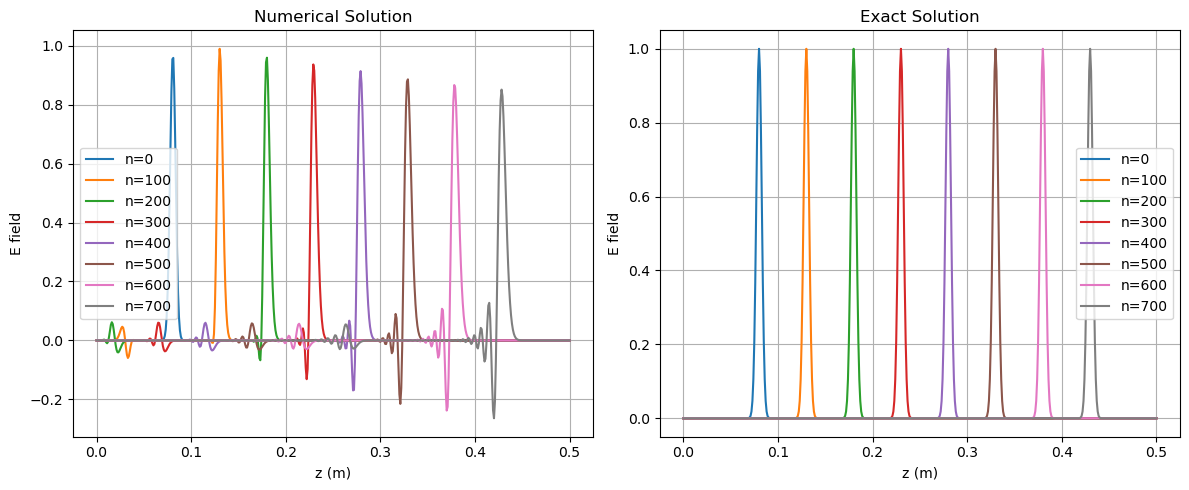

In [34]:
## Numerical Solution ##

# Initialize E, H fields
E = np.zeros(nz)        # E field (0 - 500)
H = np.zeros(nz - 1)    # H field (1/2 - 499+1/2)

E_plot = [] # store E field for plotting

# Initial conditions
ic = 80     # initial center
iw = 4      # initial width

for i in range(nz):
    E[i] = np.exp(-((i - ic) / iw)**2)  # E field

for i in range(nz-1):
    H[i] = (1 / eta0) * np.exp(-((i + 1/2 - ic - C/2) / iw)**2) # H field

# Boundary conditions
E[0] = 0
E[nz-1] = 0

# Run FDTD
for n in range(nt+1):

    # H field
    for i in range(nz-1):
        H[i] += -(dt / (mu0 * dz)) * (E[i+1] - E[i])

    # E field
    for i in range(1, nz-1):
        E[i] += -(dt / (eps0 * dz)) * (H[i] - H[i-1])

    # save results per 100 steps
    if n % 100 == 0:
        E_plot.append(E.copy())

# plot E field
z = np.arange(nz) * dz

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)

for idx, e in enumerate(E_plot):
    plt.plot(z, e, label=f'n={idx*100}')

plt.xlabel("z (m)")
plt.ylabel("E field")
plt.title("Numerical Solution")
plt.legend()
plt.grid(True)


## Exact solution ##
zc = ic * dz
w = iw * dz
times = [n * 100 for n in range(8)]

plt.subplot(1,2,2)
for n in times:
    E_exact = np.exp(-((z - zc - c*n*dt)/w)**2)
    plt.plot(z, E_exact, label=f'n={n}')

# plot E field
plt.xlabel("z (m)")
plt.ylabel("E field")
plt.title("Exact Solution")
plt.legend()
plt.grid(True)

# show plots
plt.tight_layout()
plt.show()

### *Result*

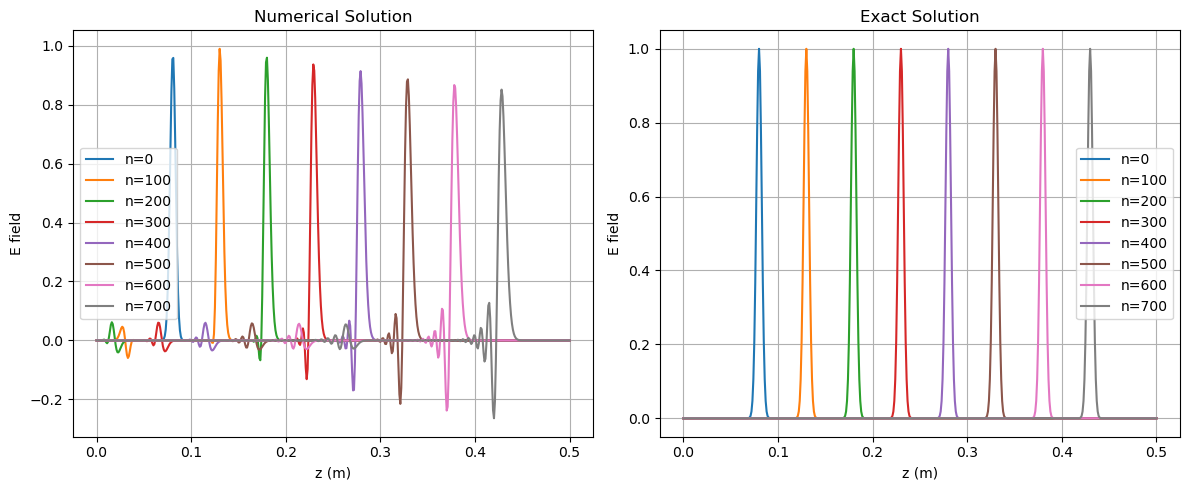

**Numerical Solution의 특징 (Exact Solution과 비교)**

1. trailing edge에서 **ringing**이 발생하고, 시간이 지날수록 커진다. 

    - 폭이 좁은 gaussian pulse에는 고주파 성분이 많이 포함되어 있다. 

    - Courant factor 0.5에서는 시간 간격이 충분히 세밀하지 않아 고주파를 제대로 처리하지 못해 전자기파에 왜곡이 생긴다. 

    - 이 왜곡이 시간이 지날수록 누적되면서 ringing 현상이 심해진다. 

2. 시간이 지날수록 **진폭이 감소**한다. 

    - 위에서 언급한 왜곡이 쌓이면서 수치적으로 에너지가 보존되지 않고 점점 손실된다.  

    - 결과적으로 파의 진폭이 시간이 갈수록 작아진다. 

## **(b) Initial Condition Problem 2**

### *Code*

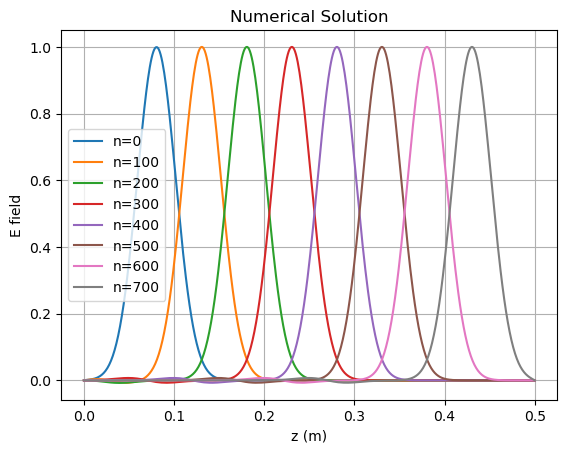

In [37]:
# Initialize E, H fields
E = np.zeros(nz)        # E field (0 - 500)
H = np.zeros(nz - 1)    # H field (1/2 - 499+1/2)

E_plot = [] # store E field for plotting

# Initial conditions
ic = 80     # initial center
iw = 30     # initial width

for i in range(nz):
    E[i] = np.exp(-((i - ic) / iw)**2)  # E field

for i in range(nz-1):
    H[i] = (1 / eta0) * np.exp(-((i + 1/2 - ic - C/2) / iw)**2) # H field

# Boundary conditions
E[0] = 0
E[nz-1] = 0

# Run FDTD
for n in range(nt+1):

    # H field
    for i in range(nz-1):
        H[i] += -(dt / (mu0 * dz)) * (E[i+1] - E[i])

    # E field
    for i in range(1, nz-1):
        E[i] += -(dt / (eps0 * dz)) * (H[i] - H[i-1])

    # save results per 100 steps
    if n % 100 == 0:
        E_plot.append(E.copy())

# plot E field
z = np.arange(nz) * dz

for idx, e in enumerate(E_plot):
    plt.plot(z, e, label=f'n={idx*100}')

plt.xlabel("z (m)")
plt.ylabel("E field")
plt.title("Numerical Solution")
plt.legend()
plt.grid(True)

plt.show()

### *Result*

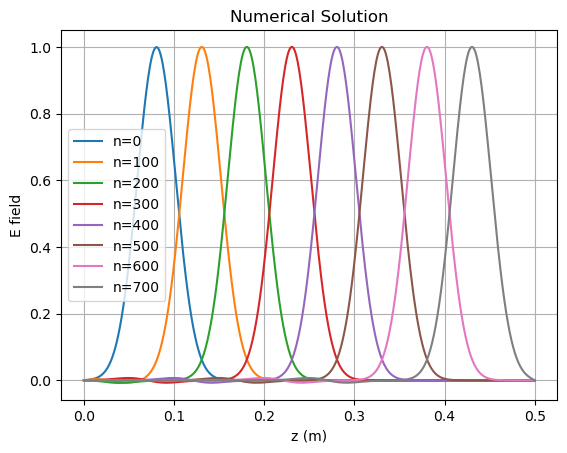

**(b) ${i_w}$ = 30일 때 Numerical Solution의 특징 ((a) ${i_w}$ = 4일 때와 비교)**

1. pulse의 폭이 넓어졌다.

    - ${i_w}$는 gaussian pulse의 폭을 조정하는 파라미터이기 때문에 그 값이 커지면 pulse도 넓어진다.  

2. trailing edge의 **ringing이 감소**했다.

    - pulse 폭이 증가하면 고주파 성분이 줄어든다.

    - 고주파로 인해 생기던 왜곡도 덜 발생하며 ringing이 유의미하게 줄어든다.

3. **진폭**이 잘 **유지**된다. 

    - 고주파 성분과 왜곡이 감소하면서 수치적 에너지 손실이 감소한다.

    - 결과적으로 파의 진폭이 비교적 잘 유지된다. 

&rarr; 2, 3과 같이 gaussian pulse의 폭을 증가시키면 Numerical Solution이 Exact Solution의 특성과 더 유사해진다. 

## **(c) Initial Condition Problem 3**

### *Code*

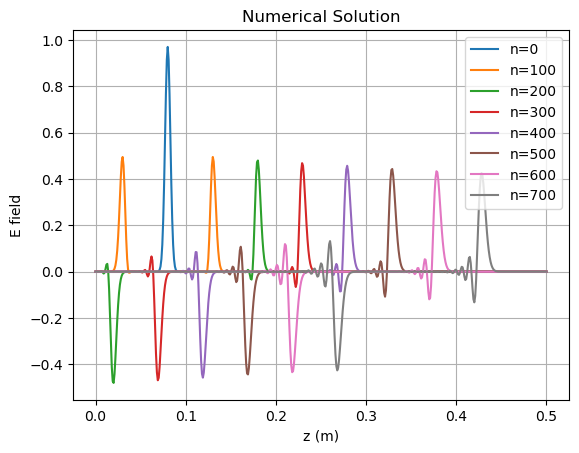

In [36]:
# Initialize E, H fields
E = np.zeros(nz)        # E field (0 - 500)
H = np.zeros(nz - 1)    # H field (1/2 - 499+1/2)

E_plot = [] # store E field for plotting

# Initial conditions
ic = 80     # initial center
iw = 4      # initial width

for i in range(nz):
    E[i] = np.exp(-((i - ic) / iw)**2)  # E field

for i in range(nz-1):
    H[i] = 0 # H field

# Boundary conditions
E[0] = 0
E[nz-1] = 0

# Run FDTD
for n in range(nt+1):

    # H field
    for i in range(nz-1):
        H[i] += -(dt / (mu0 * dz)) * (E[i+1] - E[i])

    # E field
    for i in range(1, nz-1):
        E[i] += -(dt / (eps0 * dz)) * (H[i] - H[i-1])

    # save results per 100 steps
    if n % 100 == 0:
        E_plot.append(E.copy())

# plot E field
z = np.arange(nz) * dz

for idx, e in enumerate(E_plot):
    plt.plot(z, e, label=f'n={idx*100}')

plt.xlabel("z (m)")
plt.ylabel("E field")
plt.title("Numerical Solution")
plt.legend()
plt.grid(True)

plt.show()

### *Result*

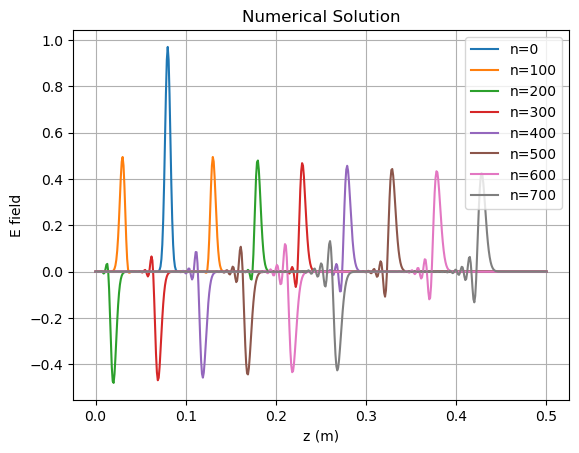

**(c) H = 0일 때 Numerical Solution의 특징 ((a) H도 gaussian pulse일 때와 비교)**

1. 전자기파가 양쪽으로 **대칭적으로 퍼진다**. 

    - 초기에 H field를 0으로 설정했기 때문에, 초기 E field는 1D 기준 양쪽 방향으로 각각 H field를 유도한다. 

    - 그렇게 생성된 H field가 다시 E field를 유도하면서, 전자기파가 반반씩 양쪽으로 퍼진다. 

    - (2D, 3D였으면 모든 방향으로 퍼졌을 것으로 예상됨)

2. 파가 경계면에서 전부 **반사**된다. 

    - Boundary Condition에서 E field를 양 끝 노드(i=0, 500)에서 0으로 정했었다. (Perfect Electric Conductor) 
    
    - 경계에서 E = 0이 되더라도 H field는 그대로 남아 내부로 E field를 유도한다.
    
    - 그렇게 전자기파가 반사되는 형태가 나타난다. 

    - (참고: (a)에서도 동일한 PEC 조건이 적용됐었지만, 반사 현상은 (c)에서 더 명확히 관찰되므로 여기에 기술함)